In [1]:
from IPython.display import display, Image
from pprint import pprint
from itertools import chain

from sympy import Function, Symbol, symbols, ratsimp, factor
import pyx

from ginv import *
sympy.init_printing()

In [2]:
Monom.cmp = Monom.POTdeglex

In [3]:
h, tau, s0, s1, s  = sympy.symbols('h, tau, \sigma_0, \sigma_1, \sigma', real=True)
h, tau, s0, s1, s

Система уравнений
\begin{equation}
  \begin{split}
    \varphi_t^{(1)}&+6\sigma_0\varphi^{(1)}\varphi_\eta^{(1)}+\varphi_{\eta\eta\eta}^{(1)}\mp 
6\sigma_1{\varphi^{(1)}}^2\varphi_\eta^{(1)}+
      \varphi^{(1)}-\varphi^{(2)}=0,\\
    \varphi_t^{(2)}&+6\sigma_0\varphi^{(2)}\varphi_\eta^{(2)}+\varphi_{\eta\eta\eta}^{(2)}\mp 
6\sigma_1{\varphi^{(2)}}^2\varphi_\eta^{(2)}+
      \varphi^{(2)}-\varphi^{(1)} - \sigma \varphi^{(2)} =0.
  \end{split} \tag{1.57}
\end{equation} 

Запишем систему уравнений (1.57) в интегральной форме:
\begin{equation}
  \begin{gathered}
\oint _{\partial \Omega } -\left( 3\sigma_0 {\phi^{(1)}} ^{2} \mp 2\sigma_1 {\phi^{(1)}} ^{3}
+ \phi^{(1)}_{\eta\eta}\right)  \, dt 
  {} + \phi^{(1)} \, d\eta - \iint \nolimits _{\Omega } \left( \phi^{(1)} - \phi^{(2)}\right) \,dt\,d\eta=0, \\
\oint _{\partial \Omega } -\left( 3\sigma_0 {\phi^{(2)}} ^{2} \mp 2\sigma_1 {\phi^{(2)}} ^{3}
+ \phi^{(2)}_{\eta\eta} \right) \, dt  
  {} +\phi^{(2)} \, d\eta - \iint \nolimits _{\Omega }\left(  \phi^{(2)}-\phi^{(1)} - \sigma \phi^{(2)}\right) \,dt\,d\eta=0.
  \end{gathered} \tag{2.1}
\end{equation} 

Введем обозначения для нелинейной части $\Phi^1 = 3\sigma_0 {\phi^{(1)}} ^{2} \mp 2\sigma_1 {\phi^{(1)}} ^{3}$
и $\Phi^2 = 3\sigma_0 {\phi^{(2)}} ^{2} \mp 2\sigma_1 {\phi^{(2)}} ^{3}$.

Тогда  систему уравнений (2.1) в интегральной форме:
\begin{equation}
  \begin{gathered}
\oint _{\partial \Omega } -\left( \Phi^1 
+ \phi^{(1)}_{\eta\eta}\right)  \, dt 
  {} + \phi^{(1)} \, d\eta - \iint \nolimits _{\Omega } \left( \phi^{(1)} - \phi^{(2)}\right) \,dt\,d\eta=0, \\
\oint _{\partial \Omega } -\left( \Phi^2 
+ \phi^{(2)}_{\eta\eta} \right) \, dt  
  {} +\phi^{(2)} \, d\eta - \iint \nolimits _{\Omega }\left(  \phi^{(2)}-\phi^{(1)} - \sigma \phi^{(2)}\right) \,dt\,d\eta=0.
  \end{gathered} \tag{2.2}
\end{equation} 

Для перехода к дискретной формулировке
положим ${u^{(i)}}_{j}^{n} =\phi^{(i)} (t_{n} ,\eta_{j} )$,
${U^{(i)}}_{j}^{n} =\Phi^{(i)} (t_{n} ,\eta_{j} )$ и выберем в качестве базового
 контур, показанный  на рисунке
<img src="./stencil2D3t2x.png" width="200">
Дополним систему (2.2) интегральными соотношениями, связывающими дискретные функции и их
дискретные производные, записанные в интегральной форме:
\begin{equation}\label{Blin_eq9}
\begin{gathered}
\int _{\eta_{j}}^{\eta_{j+1} } {u^{(i)}}_{\eta} \,d\eta ={u^{(i)}}(t,\eta_{j+1} )-{u^{(i)}}(t,\eta_{j} ), \\
\int _{\eta_{j} }^{\eta_{j+2} } {u^{(i)}}_{\eta\eta} \,d\eta ={u^{(i)}}_{\eta} (t,\eta_{j+2} )-{u^{(i)}}_{\eta} (t,\eta_{j} ). 
  \end{gathered}
\end{equation}

Используем для интегрирования по времени и первой производной по $\eta$ формулу
трапеций, а для второй производной по $\eta$ формулу среднего значения, и положим
$t_{n+1} -t_{n} =\tau $, $\eta_{j+1} -\eta_{j} =h$.

In [14]:
var = 'n, j'.split(', ')
fun = 'u1xx, u2xx, u1x, u2x, u1, u2, U1, U2'.split(', ')
T = PolySchem.T
var, fun = PolySchem.init(var, fun)
n, j = var
u1xx, u2xx, u1x, u2x, u1, u2, U1, U2 = fun

In [50]:
KDV1 = Forest(Janet)
res = ginvMin((\
-((T(U1, j, 2) + T(U1, n, j, 2))/2 - (T(U1, n) + T(U1))/2)*tau -\
((T(u1xx, j, 2) + T(u1xx, n, j, 2))/2 - (T(u1xx, n) + T(u1xx))/2)*tau +\
(2*T(u1, j) - 2*T(u1, n, j))*h -\
(T(u1, n, j) + T(u1, j))*h*tau -\
0*(T(u2, n, j) + T(u2, j))*h*tau,\
               
-((T(U2, j, 2) + T(U2, n, j, 2))/2 - (T(U2, n) + T(U2))/2)*tau -\
((T(u2xx, j, 2) + T(u2xx, n, j, 2))/2 - (T(u2xx) + T(u2xx, n))/2)*tau +\
(2*T(u2, j) - 2*T(u2, n, j))*h -\
(1 - s)*(T(u2, n, j) + T(u2, j))*h*tau -\
0*(T(u1, n, j) + T(u1, j))*h*tau,\

(T(u1x, j) + T(u1x))/2*h - (T(u1, j) - T(u1)),\
(T(u2x, j) + T(u2x))/2*h - (T(u2, j) - T(u2)),\
T(u1xx, j)*2*h - (T(u1x, j, 2) - T(u1x)),\
T(u2xx, j)*2*h - (T(u2x, j, 2) - T(u2x)),\
), KDV1, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {KDV1.count()}")
print(f"reduction: {KDV1.reduction()}")
print(f"       HP: {KDV1.HP()}")

prolong u2x*j
T(u2x, j)
prolong u1x*j
T(u1x, j)
prolong u2xx*j
T(u2xx, j)
prolong u2xx*n*j**2
T(u2xx, n)
prolong u1xx*j
T(u2, n, j, 4)
prolong u1xx*j
T(u1xx, j)
prolong u1xx*n*j**2
T(u1xx, n)
prolongAll
T(u1, n, j, 4)
prolongAll
crit1: 0
crit2: 0
 time: 0.14 sec
    count: 8
reduction: 16
       HP: s^2 + 15s - 4


In [51]:
for w in KDV1.GB():
    print(f"{w.lm.position()} -> {w.poly}\n")

0 -> T(u1xx, j)*h**2 + T(u1, j, 2)*-1 + T(u1, j)*2 + T(u1)*-1

0 -> T(u1xx, n)*h**2*tau + T(u1xx)*h**2*tau + T(u1, n, j, 3)*-tau + T(u1, n, j, 2)*2*tau + T(u1, j, 3)*-tau + T(u1, n, j)*-2*h**3*tau - 4*h**3 - tau + T(u1, j, 2)*2*tau + T(u1, j)*-2*h**3*tau + 4*h**3 - tau + T(U1, n, j, 2)*-h**2*tau + T(U1, j, 2)*-h**2*tau + T(U1, n)*h**2*tau + T(U1)*h**2*tau

1 -> T(u2xx, j)*h**2 + T(u2, j, 2)*-1 + T(u2, j)*2 + T(u2)*-1

1 -> T(u2xx, n)*h**2*tau + T(u2xx)*h**2*tau + T(u2, n, j, 3)*-tau + T(u2, n, j, 2)*2*tau + T(u2, j, 3)*-tau + T(u2, n, j)*2*\sigma*h**3*tau - 2*h**3*tau - 4*h**3 - tau + T(u2, j, 2)*2*tau + T(u2, j)*2*\sigma*h**3*tau - 2*h**3*tau + 4*h**3 - tau + T(U2, n, j, 2)*-h**2*tau + T(U2, j, 2)*-h**2*tau + T(U2, n)*h**2*tau + T(U2)*h**2*tau

2 -> T(u1x, j)*h + T(u1x)*h + T(u1, j)*-2 + T(u1)*2

3 -> T(u2x, j)*h + T(u2x)*h + T(u2, j)*-2 + T(u2)*2

4 -> T(u1, n, j, 4)*tau + T(u1, n, j, 3)*-2*tau + T(u1, j, 4)*tau + T(u1, n, j, 2)*2*h**3*tau + 4*h**3 + T(u1, j, 3)*-2*tau + T(u1, n, j)*

In [52]:
for w in KDV1.GB():
    print(f"{w.lm.position()} -> {w.lm.T()} + {len(w.poly)-1} слагаемых")

0 -> T(u1xx, j) + 3 слагаемых
0 -> T(u1xx, n) + 11 слагаемых
1 -> T(u2xx, j) + 3 слагаемых
1 -> T(u2xx, n) + 11 слагаемых
2 -> T(u1x, j) + 3 слагаемых
3 -> T(u2x, j) + 3 слагаемых
4 -> T(u1, n, j, 4) + 13 слагаемых
5 -> T(u2, n, j, 4) + 13 слагаемых


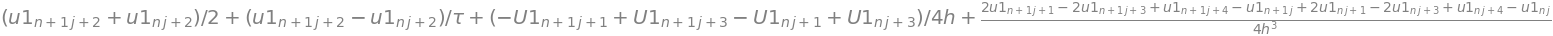

In [53]:
for w in KDV1[4].GB():
    p1 = PolySchem(w.poly)
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()
    display(ratsimp(p.coeff(tau, 0).coeff(h, 3)/(4*tau)) +
            factor(p.coeff(tau, 1).coeff(h, 3)/(4)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 2)/(4*h)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 0)/(4*h**3)))

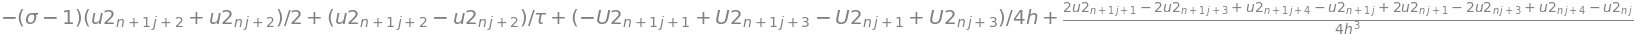

In [54]:
for w in KDV1[5].GB():
    p2 = PolySchem(w.poly)
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()
    display(ratsimp(p.coeff(tau, 0).coeff(h, 3)/(4*tau)) +
            factor(p.coeff(tau, 1).coeff(h, 3)/(4)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 2)/(4*h)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 0)/(4*h**3)))

In [19]:
KDV2 = Forest(Janet)
res = ginvMin((\
-((T(U1, j, 2) + T(U1, n, j, 2))/2 - (T(U1, n) + T(U1))/2)*tau -\
((T(u1xx, j, 2) + T(u1xx, n, j, 2))/2 - (T(u1xx, n) + T(u1xx))/2)*tau +\
(2*T(u1, j) - 2*T(u1, n, j))*h -\
(T(u1, n, j) + T(u1, j))*h*tau -\
(T(u2, n, j) + T(u2, j))*h*tau,\
               
-((T(U2, j, 2) + T(U2, n, j, 2))/2 - (T(U2, n) + T(U2))/2)*tau -\
((T(u2xx, j, 2) + T(u2xx, n, j, 2))/2 - (T(u2xx) + T(u2xx, n))/2)*tau +\
(2*T(u2, j) - 2*T(u2, n, j))*h -\
(1 - s)*(T(u2, n, j) + T(u2, j))*h*tau -\
(T(u1, n, j) + T(u1, j))*h*tau,\

(T(u1x, j) + T(u1x))/2*h - (T(u1, j) - T(u1)),\
(T(u2x, j) + T(u2x))/2*h - (T(u2, j) - T(u2)),\
T(u1xx, j)*2*h - (T(u1x, j, 2) - T(u1x)),\
T(u2xx, j)*2*h - (T(u2x, j, 2) - T(u2x)),\
), KDV2, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {KDV2.count()}")
print(f"reduction: {KDV2.reduction()}")
print(f"       HP: {KDV2.HP()}")

prolong u2x*j
T(u2x, j)
prolong u1x*j
T(u1x, j)
prolong u2xx*j
T(u2xx, j)
prolong u2xx*n*j**2
T(u2xx, n)
prolong u1xx*j
T(u1, n, j, 2)
prolong u1xx*j
T(u1xx, j)
prolong u1xx*n*j**2
T(u1xx, n)
prolongAll
T(u1, n, j)
prolong u1*n*j**2
T(u1, j, 3)
prolongAll
T(u1, n, 2)
prolongAll
T(u2, n, 2, j, 8)
prolongAll
crit1: 0
crit2: 0
 time: 1.57 sec
    count: 10
reduction: 36
       HP: s^2 + 15s - 25


In [30]:
for w in KDV2.GB():
    print(f"{w.lm.position()} -> {w.lm.T()} + {len(w.poly)-1} слагаемых")

0 -> T(u1xx, j) + 3 слагаемых
0 -> T(u1xx, n) + 37 слагаемых
1 -> T(u2xx, j) + 3 слагаемых
1 -> T(u2xx, n) + 34 слагаемых
2 -> T(u1x, j) + 3 слагаемых
3 -> T(u2x, j) + 3 слагаемых
4 -> T(u1, j, 3) + 39 слагаемых
4 -> T(u1, n, j) + 32 слагаемых
4 -> T(u1, n, 2) + 56 слагаемых
5 -> T(u2, n, 2, j, 8) + 53 слагаемых


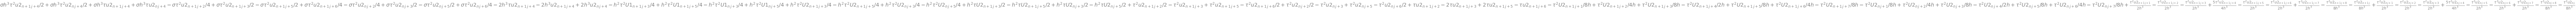

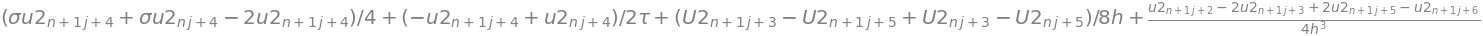

0


In [49]:
p = T(u1, j, 4)
p.NF(KDV2)
p1 = p - T(u1, j, 4)
p = sum(Symbol(m.T_latex())*c*2*tau*h**3 for m, c in p).expand()
display(p)
display(ratsimp(p.coeff(tau, 0).coeff(h, 3)/(4*tau)) +
        factor(p.coeff(tau, 1).coeff(h, 3)/(4)) +
        ratsimp(p.coeff(tau, 1).coeff(h, 2)/(4*h)) +
        ratsimp(p.coeff(tau, 1).coeff(h, 0)/(4*h**3)))
p1.NF(KDV2)
print(p1)

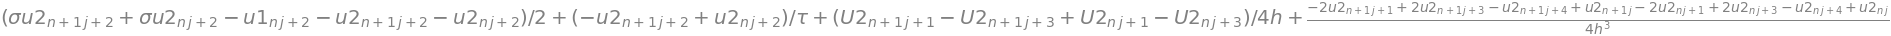

0


In [47]:
p = T(u1, n, j, 2)
p.NF(KDV2)
p2 = p - T(u1, n, j, 2)
p = sum(Symbol(m.T_latex())*c*2*tau*h**3 for m, c in p).expand()
display(p)
display(ratsimp(p.coeff(tau, 0).coeff(h, 3)/(4*tau)) +
        factor(p.coeff(tau, 1).coeff(h, 3)/(4)) +
        ratsimp(p.coeff(tau, 1).coeff(h, 2)/(4*h)) +
        ratsimp(p.coeff(tau, 1).coeff(h, 0)/(4*h**3)))
p2.NF(KDV2)
print(p2)

In [56]:
p1 = T(u1, n, j, 4)*tau + T(u1, n, j, 3)*(-2*tau) + T(u1, n, j, 2)*(2*h**3*tau + 4*h**3) +\
T(u1, n, j)*2*tau + T(u1, n)*(-tau) + T(u1, j, 4)*tau + T(u1, j, 3)*(-2*tau) +\
T(u1, j, 2)*(2*h**3*tau - 4*h**3) + T(u1, j)*2*tau + T(u1)*(-tau) +\
T(u2, n, j, 2)*2*h**3*tau + T(u2, j, 2)*2*h**3*tau + T(U1, n, j, 3)*h**2*tau +\
T(U1, n, j)*(-h**2*tau) + T(U1, j, 3)*h**2*tau + T(U1, j)*(-h**2*tau)
p1.NF(KDV2)
p1

T(u1, j, 2)*8*h**3 + T(u2, n, j, 4)*2 + T(u2, n, j, 3)*-4 + T(u2, j, 4)*2 + T(u2, n, j, 2)*-4*\sigma*h**3 - 2*h**3*tau + 4*h**3 + 8*h**3/tau + T(u2, j, 3)*-4 + T(u2, n, j)*4 + T(u2, j, 2)*-4*\sigma*h**3 - 2*h**3*tau + 4*h**3 - 8*h**3/tau + T(u2, n)*-2 + T(u2, j)*4 + T(u2)*-2 + T(U2, n, j, 3)*2*h**2 + T(U2, j, 3)*2*h**2 + T(U2, n, j)*-2*h**2 + T(U2, j)*-2*h**2


In [37]:
p2 = T(u2, n, j, 4)*tau + T(u2, n, j, 3)*(-2*tau) + T(u2, n, j, 2)*(-2*s*h**3*tau +\
2*h**3*tau + 4*h**3) + T(u2, n, j)*2*tau + T(u2, n)*(-tau) + T(u2, j, 4)*tau +\
T(u2, j, 3)*(-2*tau) + T(u2, j, 2)*(-2*s*h**3*tau + 2*h**3*tau - 4*h**3) +\
T(u2, j)*2*tau + T(u2)*(-tau) + T(U2, n, j, 3)*h**2*tau + T(U2, n, j)*(-h**2*tau) +\
T(U2, j, 3)*h**2*tau + T(U2, j)*(-h**2*tau) +\
T(u1, n, j, 2)*2*h**3*tau + T(u1, j, 2)*2*h**3*tau 
p2.NF(KDV2)
p2

[]

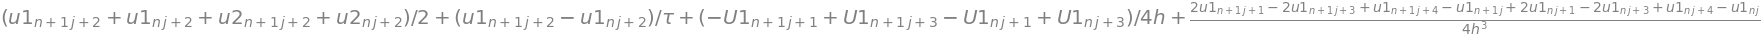

In [22]:
# p1 = T(u1, n, j, 4)*tau + T(u1, n, j, 3)*(-2*tau) + T(u1, n, j, 2)*(2*h**3*tau + 4*h**3) +\
# T(u1, n, j)*2*tau + T(u1, n)*(-tau) + T(u1, j, 4)*tau + T(u1, j, 3)*(-2*tau) +\
# T(u1, j, 2)*(2*h**3*tau - 4*h**3) + T(u1, j)*2*tau + T(u1)*(-tau) +\
# T(u2, n, j, 2)*2*h**3*tau + T(u2, j, 2)*2*h**3*tau + T(U1, n, j, 3)*h**2*tau +\
# T(U1, n, j)*(-h**2*tau) + T(U1, j, 3)*h**2*tau + T(U1, j)*(-h**2*tau)
p = PolySchem(p1)
# p.NF(KDV2)
p
p = sum(Symbol(m.T_latex())*c for m, c in p).expand()
display(ratsimp(p.coeff(tau, 0).coeff(h, 3)/(4*tau)) +
        factor(p.coeff(tau, 1).coeff(h, 3)/(4)) +
        ratsimp(p.coeff(tau, 1).coeff(h, 2)/(4*h)) +
        ratsimp(p.coeff(tau, 1).coeff(h, 0)/(4*h**3)))

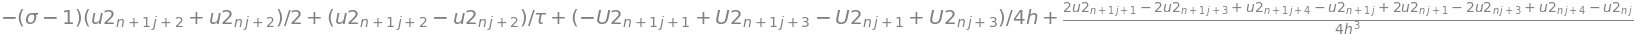

In [23]:
# p2 = T(u2, n, j, 4)*tau + T(u2, n, j, 3)*(-2*tau) + T(u2, n, j, 2)*(-2*s*h**3*tau +\
# 2*h**3*tau + 4*h**3) + T(u2, n, j)*2*tau + T(u2, n)*(-tau) + T(u2, j, 4)*tau +\
# T(u2, j, 3)*(-2*tau) + T(u2, j, 2)*(-2*s*h**3*tau + 2*h**3*tau - 4*h**3) +\
# T(u2, j)*2*tau + T(u2)*(-tau) + T(U2, n, j, 3)*h**2*tau + T(U2, n, j)*(-h**2*tau) +\
# T(U2, j, 3)*h**2*tau + T(U2, j)*(-h**2*tau) +\
# T(u1, n, j, 2)*2*h**3*tau + T(u1, j, 2)*2*h**3*tau 
p = PolySchem(p2)
p.NF(KDV2)
p = sum(Symbol(m.T_latex())*c for m, c in p).expand()
display(ratsimp(p.coeff(tau, 0).coeff(h, 3)/(4*tau)) +
        factor(p.coeff(tau, 1).coeff(h, 3)/(4)) +
        ratsimp(p.coeff(tau, 1).coeff(h, 2)/(4*h)) +
        ratsimp(p.coeff(tau, 1).coeff(h, 0)/(4*h**3)))

In [13]:
p1 = T(u1, n, j, 4)*tau + T(u1, n, j, 3)*(-2*tau) + T(u1, n, j, 2)*(2*h**3*tau + 4*h**3) +\
T(u1, n, j)*2*tau + T(u1, n)*(-tau) + T(u1, j, 4)*tau + T(u1, j, 3)*(-2*tau) +\
T(u1, j, 2)*(2*h**3*tau - 4*h**3) + T(u1, j)*2*tau + T(u1)*(-tau) +\
T(u2, n, j, 2)*2*h**3*tau + T(u2, j, 2)*2*h**3*tau + T(U1, n, j, 3)*h**2*tau +\
T(U1, n, j)*(-h**2*tau) + T(U1, j, 3)*h**2*tau + T(U1, j)*(-h**2*tau)

p2 = T(u2, n, j, 4)*tau + T(u2, n, j, 3)*(-2*tau) + T(u2, n, j, 2)*(-2*s*h**3*tau +\
2*h**3*tau + 4*h**3) + T(u2, n, j)*2*tau + T(u2, n)*(-tau) + T(u2, j, 4)*tau +\
T(u2, j, 3)*(-2*tau) + T(u2, j, 2)*(-2*s*h**3*tau + 2*h**3*tau - 4*h**3) +\
T(u2, j)*2*tau + T(u2)*(-tau) + T(U2, n, j, 3)*h**2*tau + T(U2, n, j)*(-h**2*tau) +\
T(U2, j, 3)*h**2*tau + T(U2, j)*(-h**2*tau) +\
T(u1, n, j, 2)*2*h**3*tau + T(u1, j, 2)*2*h**3*tau 

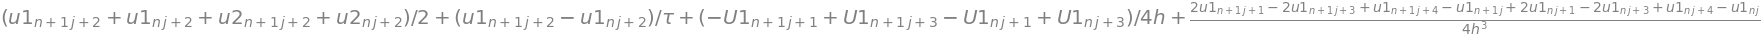

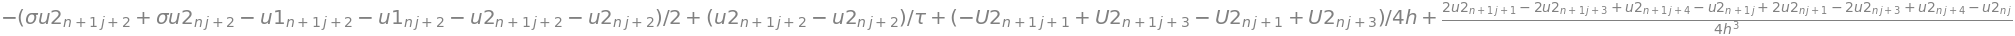

In [14]:
for poly in (p1, p2):
    p = sum(Symbol(m.T_latex())*c for m, c in poly).expand()
    display(ratsimp(p.coeff(tau, 0).coeff(h, 3)/(4*tau)) +
            factor(p.coeff(tau, 1).coeff(h, 3)/(4)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 2)/(4*h)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 0)/(4*h**3)))
    print()